# results

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pickle
from matplotlib.font_manager import FontProperties  

%matplotlib inline

In [119]:
os.listdir(f'results/')

['result_a2_cpu_120.pkl',
 'result_fix_cpu_90.pkl',
 'result_fix_cpu_60.pkl',
 'result_a2_cpu_60.pkl',
 'result_adapative_d_cpu_90.pkl',
 'result_fix_cpu_3.pkl',
 'result_adaptive_m_cpu_120.pkl',
 'result_heu_cpu_60.pkl',
 'Untitled1.ipynb',
 'result_fix_cpu_120.pkl',
 'result_adapative_d_cpu_60.pkl',
 'result_adaptive_d_cpu_120.pkl',
 'result_heu_cpu_120.pkl',
 'mobilenet_dcp_from_0_to_0dot8_jpeg_from_25_to_100.npy',
 'result_adapative_m_cpu_60.pkl',
 'result_adapative_d_cpu_3.pkl',
 'resnet18_dcp_from_0_to_0dot8_jpeg_from_25_to_100.npy',
 'result_heu_cpu_3.pkl',
 'result_heu_cpu_90.pkl',
 'result_adapative_m_cpu_3.pkl',
 'result_a2_cpu_3.pkl',
 'result_a2_cpu_90.pkl',
 'result_adapative_m_cpu_90.pkl']

In [120]:
result_dict = {}
for file in os.listdir(f'results/'): 
    if file.endswith('90.pkl'):
        with open (f'results/{file}','rb') as f:
            con = pickle.load(f)
            
            result_dict[file[7:-11]] = con
print(result_dict.keys())

dict_keys(['fix', 'adapative_d', 'heu', 'a2', 'adapative_m'])


# Deploy Cost

In [121]:
# # 代码中的“...”代表省略的其他参数
# ax = plt.subplot(111)
# # 设置刻度字体大小
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
# # 设置图例字体大小
# ax.legend(..., fontsize=20)


In [122]:
FONTSIZE = 12


# 

In [133]:
#‘serif’, ‘sans-serif’, ‘cursive’, ‘fantasy’, or ‘monospace’
class Yanplotlib():
    def __init__(self,fontsize = 13, font ='serif', weight = 'bold'):
        self.fontsize= fontsize
        self.font = font
        self.weight = weight
        self.font_dict = {'family' : self.font,
        'weight' : self.weight,
        'size' : self.fontsize}
        self.ticks_font = matplotlib.font_manager.FontProperties(family=self.font, size=fontsize, weight=weight)
        
    def after_plot(self,**kw_args):
        #设置坐标刻度值的大小以及刻度值的字体
        plt.tick_params(labelsize=self.fontsize)
        labels = self.ax.get_xticklabels() + self.ax.get_yticklabels()
        [label.set_fontname(self.font) for label in labels]
        [label.set_fontproperties(self.ticks_font)  for label in labels]
        try:
            xticks_val = kw_args['xticks_val']
            xticks_label = kw_args['xticks_label']
            plt.xticks(xticks_val,xticks_label)
        except:
            plt.xticks()
        try:            
            yticks_val = kw_args['yticks_val']
            yticks_label = kw_args['yticks_label']
            plt.xticks(yticks_val,yticks_label)
        except:
            plt.yticks()
            
        xlabel =  kw_args['xlabel']
        ylabel =  kw_args['ylabel']
        try:
            title =  kw_args['title']
            plt.title(title,fontdict=self.font_dict)
        except:
            plt.title(fontdict=self.font_dict)
        name = kw_args['name']
        self.ax.set_xlabel(xlabel,self.font_dict)
        self.ax.set_ylabel(ylabel, self.font_dict)
        plt.legend(prop=self.font_dict)
        plt.show()
        plt.savefig(name)
        
    def before_plot(self,figsize = (4,5)):
        self.fig, self.ax = plt.subplots(figsize=figsize)
        
    def set_fontsize(self,size):
        self.fontsize = size



        

In [134]:
yan = Yanplotlib()


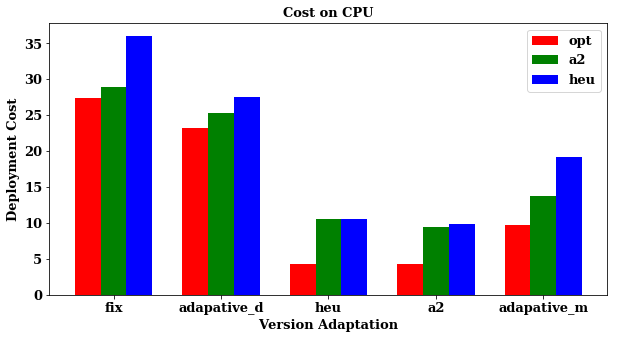

In [135]:
cost_opt_lst = []
cost_a2_lst = []
cost_heu_lst = []

for key, item in result_dict.items():
    cost_a2_lst.append(item['cost'])
    cost_opt_lst.append(item['cost_opt'])
    cost_heu_lst.append(item['cost_heu'])
cost = [cost_opt_lst,cost_a2_lst,cost_heu_lst]
label = ['opt','a2','heu']
lw = 4
bar_width = 0.3
colors = ['r','g','b']
ticks_val = np.linspace(0,5,5)

yan.before_plot((10,5))
for index,val in enumerate(label):
#     print(ticks_val+index*bar_width)
    plt.bar(ticks_val+index*bar_width,cost[index],width=bar_width,color=colors[index],label=label[index])

kw_args = {'xticks_val':ticks_val+bar_width,
                'xticks_label':list(result_dict.keys()),
                'xlabel':'Version Adaptation',
                'ylabel':'Deployment Cost',
                'name':'cost.pdf',
                'title':'Cost on CPU'
          }
yan.after_plot(**kw_args)

In [84]:
for key, item in result_dict .items():
    print(key,item['avg_bw'])


fix 92.0
adapative_d 70.387987013
heu 53.0490134865
a2 43.1882492507
adapative_m 92.0


# avg latency  with time

In [105]:
time_lst = []
latency_lst = []
req_lst = []
req_dict = {}
history_dict = {}
latency_dict = {}
time_dict = {}
config_dict = {}

for key, item in result_dict.items():
    history_dict[key] = item['history']

for key in result_dict.keys():
    req_lst = [i['requests'] for i in history_dict[key]]
#     for item in history_dict[key]:
#         req_lst.append(item['requests'])
    req_dict[key] = req_lst
#     req_lst = []

    config_dict[key] =  [list(i.values()) for i in list(req_dict[key])]
    for item in config_dict[key]:
        for i in item:
            latency_lst.append(i['real_latency'])
            time_lst.append(i['time'])
    latency_dict[key] = latency_lst
    time_dict[key] = time_lst
    latency_lst,time_lst = [],[]
    


In [86]:
print(time_dict['fix'])

['13:35:55', '13:35:55', '13:35:55', '13:35:55', '13:35:56', '13:35:56', '13:35:57', '13:35:57', '13:35:57', '13:35:57', '13:36:2', '13:36:6', '13:36:10', '13:36:13', '13:36:13', '13:36:17', '13:36:20', '13:36:22', '13:36:22', '13:36:23', '13:36:25', '13:36:25', '13:36:26', '13:36:26', '13:36:27', '13:36:28', '13:36:28', '13:36:28', '13:36:29', '13:36:30', '13:36:32', '13:36:33', '13:36:34', '13:36:36', '13:36:37', '13:36:37', '13:36:37', '13:36:38', '13:36:40', '13:36:41', '13:36:43', '13:36:46', '13:36:48', '13:36:48', '13:36:48', '13:36:49', '13:36:49', '13:36:49', '13:36:49', '13:36:50', '13:36:52', '13:36:52', '13:36:53', '13:36:56', '13:36:57', '13:36:58', '13:36:59', '13:37:3', '13:37:3', '13:37:3', '13:37:5', '13:37:7', '13:37:8', '13:37:11', '13:37:11', '13:37:12', '13:37:15', '13:37:16', '13:37:17', '13:37:17', '13:37:20', '13:37:24', '13:37:24', '13:37:25', '13:37:25', '13:37:26', '13:37:26', '13:37:28', '13:37:28', '13:37:29', '13:37:29', '13:37:31', '13:37:32', '13:37:32',

In [12]:
print(latency_dict['fix'])

[1.194643126000301, 1.1947899049991975, 1.1941295490032644, 0.0012372850032988936, 0.015122772005270235, 0.0008812250016489998, 0.08270949699362973, 0.35087326699431287, 0.3255049869985669, 0.5081946079953923, 1.0738374370048405, 0.017090382003516424, 0.016387345000111964, 0.10062331399967661, 0.12405597400356783, 0.01544442999875173, 0.5458915760027594, 0.03673328299919376, 0.024903083001845516, 0.35688573899824405, 0.023083717002009507, 0.0392147670063423, 0.024968822006485425, 0.03983651300222846, 0.01705858900095336, 0.05742838400328765, 0.030243028995755594, 0.0460434400010854, 0.015228262003802229, 0.3164579660005984, 0.017814578997786157, 0.46169812099833507, 0.016916286003834102, 0.06685701000242261, 0.057666246000735555, 0.09665097299875924, 0.11184925799898338, 0.017285069996432867, 0.01626548900094349, 0.20706409199920017, 0.3054202460043598, 0.023340593004832044, 0.04346726299991133, 0.03114137199736433, 0.06083336000301642, 0.0582323139969958, 0.04629601400665706, 0.080167

In [106]:
tmp = ''
avg_latency_time = {}
latency_time_lst = []
key_avg_latency_time = {}
key_number={}
number_time = {}


for key in result_dict.keys():
    tmp = time_dict[key][0]
#     print(time_dict[key])
    for index, item in enumerate(time_dict[key]):
        latency_time_lst.append(latency_dict[key][index])        
#         print()
        if item != tmp:
            key_avg_latency_time[tmp] = np.average(latency_time_lst)
            key_number[tmp] = len(latency_time_lst)
            latency_time_lst = []
            tmp = item
    
    avg_latency_time[key] = key_avg_latency_time
    number_time[key] = key_number
    key_avg_latency_time = {}
    key_number = {}
    
# print(number_time['a2'])

In [107]:
from datetime import datetime, timedelta
import time
time_lst = []
new_lst = []
tmp1= ''
new_avg_latency_time = {}
new_key_avg_latency_time = {}
for key in avg_latency_time.keys():
    new_key_avg_latency_time = {}
    
    for index,item in avg_latency_time[key].items():
        time_lst=index.split(':')
        for i in time_lst:
            if len(i)==1:
                i = '0'+i
            tmp1+=i+':'
        time_index = int(time.mktime(time.strptime(tmp1[:-1], "%H:%M:%S")))
        tmp1 = ''       
        new_key_avg_latency_time[time_index] = item

    new_avg_latency_time[key] = new_key_avg_latency_time
    print(1111,new_key_avg_latency_time)
    new_key_avg_latency_time = {}
    print(2222,new_key_avg_latency_time)

    
# print(new_avg_latency_time['fix'])



1111 {-2208968988: 1.8798252899941872, -2208968987: 1.8576654130010866, -2208968986: 1.9295880523350206, -2208968981: 1.3836487750013475, -2208968977: 1.2965303000019048, -2208968973: 0.91781018900292111, -2208968970: 0.76874416800274048, -2208968966: 0.95638276177256065, -2208968963: 0.9196756515011657, -2208968961: 1.9208149280020734, -2208968960: 0.84760977180038544, -2208968958: 2.0269036660029087, -2208968957: 0.99417374436531891, -2208968956: 1.5808358880021842, -2208968955: 1.7079578817501897, -2208968954: 1.4441228051426671, -2208968953: 0.79105222000362119, -2208968951: 1.1093027555689332, -2208968950: 0.88829287683317182, -2208968949: 1.6412971276117281, -2208968947: 1.1680423849975341, -2208968946: 1.1950975479994668, -2208968945: 1.6752157114970032, -2208968943: 1.6086656450024748, -2208968942: 1.8406935310049448, -2208968940: 1.7998510116691857, -2208968937: 1.4910936019368819, -2208968935: 0.91036291299678851, -2208968934: 0.92585370200004036, -2208968933: 1.2348149984372

280


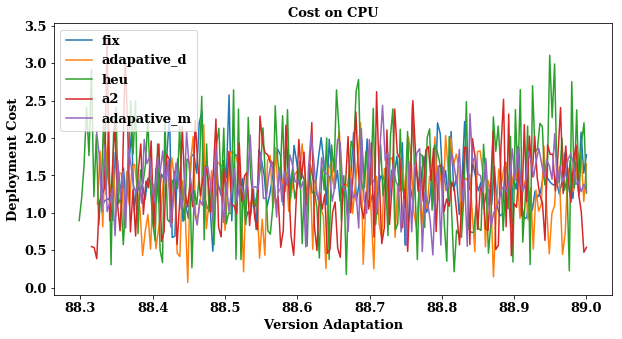

In [108]:
length  = len(avg_latency_time['a2'])
print(length)
ticks_val = np.linspace(0,10,length)
ticks_label = np.linspace(0,10,length)
lenn = 88
# print((number_time['fix']))
yan.before_plot((10,5))
# result_dict = {'a2':1}

for key,val in result_dict.items():
#     key = 'a2'
    length  = len(avg_latency_time[key])
    y = smooth(list(avg_latency_time[key].values()),0)
#     print(key,len(y[lenn:]))
#           ,len(number_time['fix'].values()))
    plt.plot(np.linspace(lenn,89,length)[lenn:],y[lenn:] ,label = key)
#     plt.plot(np.linspace(lenn,89,length)[lenn:], number_time[key].values() ,label = 'number')
    kw_args = {
#         'xticks_val':np.linspace(0,10,length),
                    'xticks_label':np.linspace(lenn,89,length),
                    'xlabel':'Version Adaptation',
                    'ylabel':'Deployment Cost',
                    'name':'cost.pdf',
                    'title':'Cost on CPU'
              }
yan.after_plot(**kw_args)


# yan.before_plot((10,5))
# result_dict = {'a2':1}

# for key,val in result_dict.items():
# #     key = 'a2'
#     length  = len(avg_latency_time[key])
#     y = smooth(list(avg_latency_time[key].values()),0)
# #     print(key,len(y[lenn:]))
# #           ,len(number_time['fix'].values()))
# #     plt.plot(np.linspace(lenn,89,length)[lenn:],y[lenn:] ,label = key)
#     plt.plot(np.linspace(lenn,89,length)[lenn:], list(number_time[key].values())[lenn:] ,label = 'number')
#     kw_args = {
# #         'xticks_val':np.linspace(0,10,length),
#                     'xticks_label':np.linspace(lenn,89,length),
#                     'xlabel':'Version Adaptation',
#                     'ylabel':'Deployment Cost',
#                     'name':'cost.pdf',
#                     'title':'Cost on CPU'
#               }
# yan.after_plot(**kw_args)
# plt.show()


In [109]:
def smooth(y,weight):
    data = y
    last = data[0]
    smoothed = []
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

help(ax.get_xticklabels().set_fontproperties())

# violate rate

In [125]:
time_lst = []
latency_lst = []
req_dict = {}
history_dict = {}
latency_dict = {}
time_dict = {}
config_dict = {}

latency_limit_dict = {}
latecny_limit = 0
violate_rate={}
violate_rate_lst =[]

lenn = 0

for key, item in result_dict.items():
    history_dict[key] = item['history']

for key in result_dict.keys():
    for h in history_dict[key]:
        latecny_limit = h['latency_limit']
        req_dict[key] = h['requests']
#         print(key,latecny_limit)
        for j in list(req_dict[key].values()):
            latency = j['real_latency']
            if latecny_limit-latency>=0:
                violate_rate_lst.append(1)
                violate_rate[key] = violate_rate_lst
            else:
#                 print(key,latecny_limit,latency)
                violate_rate_lst.append(0)
                violate_rate[key] = violate_rate_lst
#         print(len( violate_rate[key]))
    violate_rate_lst = []
    violate_rate[key] = violate_rate[key][lenn:].count(0)/len(violate_rate[key][lenn:])

print(violate_rate)

{'fix': 0.15503246753246752, 'adapative_d': 0.17457542457542458, 'heu': 0.23476523476523475, 'a2': 0.18262987012987014, 'adapative_m': 0.22952047952047952}


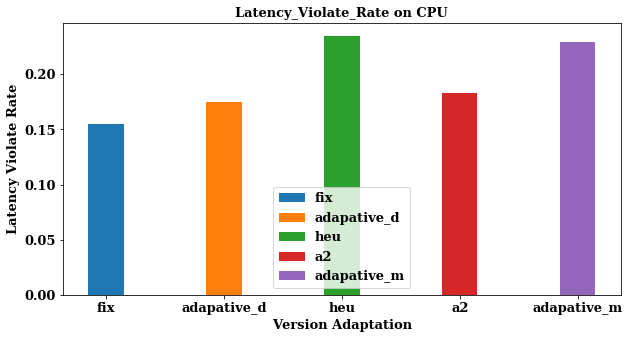

In [144]:
yan = Yanplotlib()
yan.before_plot((10,5))
n =0
for key,val in violate_rate.items():
#     print(key,violate_rate[key])

#     print(ticks_val+index*bar_width)
    plt.bar(n,violate_rate[key],width=bar_width,label=key)
    n+=1

kw_args = {
    'xticks_val':np.linspace(0,4,5),
                'xticks_label':list(result_dict.keys()),
                'xlabel':'Version Adaptation',
                'ylabel':'Latency Violate Rate',
                'name':'Latency_Violate_Rate.pdf',
                'title':'Latency_Violate_Rate on CPU'
          }
yan.after_plot(**kw_args)

In [146]:
time_lst = []
latency_lst = []
req_dict = {}
history_dict = {}
latency_dict = {}
time_dict = {}
config_dict = {}

latency_limit_dict = {}
latecny_limit = 0
violate_rate={}
violate_rate_lst =[]

lenn = 0

for key, item in result_dict.items():
    history_dict[key] = item['history']

for key in result_dict.keys():
    for h in history_dict[key]:
        latecny_limit = h['latency_limit']
        req_dict[key] = h['requests']
#         print(key,latecny_limit)
        for j in list(req_dict[key].values()):
            latency = j['real_latency']
            violate_rate_lst.append(latency)
#             if latecny_limit-latency>=0:
#                 violate_rate_lst.append(1)
            violate_rate[key] = violate_rate_lst
#             else:
#                 print(key,latecny_limit,latency)
#                 violate_rate_lst.append(0)
#                 violate_rate[key] = violate_rate_lst
# #         print(len( violate_rate[key]))
    violate_rate[key] = np.average(violate_rate[key])
    violate_rate_lst = []
#     violate_rate[key] = violate_rate[key][lenn:].count(0)/len(violate_rate[key][lenn:])

print(violate_rate)

{'fix': 1.1514885475475485, 'adapative_d': 1.0399636185266112, 'heu': 1.0562033474479027, 'a2': 0.96208289035991668, 'adapative_m': 1.1785938339405664}


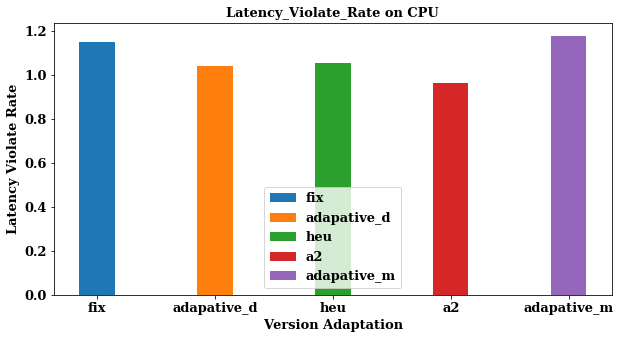

In [147]:
yan.before_plot((10,5))
n =0
for key,val in violate_rate.items():
#     print(key,violate_rate[key])

#     print(ticks_val+index*bar_width)
    plt.bar(n,violate_rate[key],width=bar_width,label=key)
    n+=1

kw_args = {
    'xticks_val':np.linspace(0,4,5),
                'xticks_label':list(result_dict.keys()),
                'xlabel':'Version Adaptation',
                'ylabel':'Latency Violate Rate',
                'name':'Latency_Violate_Rate.pdf',
                'title':'Latency_Violate_Rate on CPU'
          }
yan.after_plot(**kw_args)

In [150]:
x = []
for key, item in result_dict.items():
    x.append(item['y'])
print(x)


[{"('13.113.242.68', 'res18', 0, 0, 0, 1)": 0.0, "('54.71.245.31', 'res18', 0, 0, 0, 1)": 0.0, "('18.218.238.223', 'res18', 0, 0, 0, 1)": 0.0, "('18.136.13.110', 'res18', 0, 0, 0, 1)": 1.0, "('13.235.174.165', 'res18', 0, 0, 0, 1)": 0.0, "('52.63.190.63', 'res18', 0, 0, 0, 1)": 0.0, "('13.113.242.68', 'res18', 0, 0, 1, 1)": 0.0, "('54.71.245.31', 'res18', 0, 0, 1, 1)": 0.0, "('18.218.238.223', 'res18', 0, 0, 1, 1)": 0.0, "('18.136.13.110', 'res18', 0, 0, 1, 1)": 0.0, "('13.235.174.165', 'res18', 0, 0, 1, 1)": 0.0, "('52.63.190.63', 'res18', 0, 0, 1, 1)": 1.0, "('13.113.242.68', 'res18', 0, 0, 2, 1)": 0.0, "('54.71.245.31', 'res18', 0, 0, 2, 1)": 0.0, "('18.218.238.223', 'res18', 0, 0, 2, 1)": 0.0, "('18.136.13.110', 'res18', 0, 0, 2, 1)": 0.0, "('13.235.174.165', 'res18', 0, 0, 2, 1)": 0.0, "('52.63.190.63', 'res18', 0, 0, 2, 1)": 1.0, "('13.113.242.68', 'res18', 0, 0, 3, 1)": 0.0, "('54.71.245.31', 'res18', 0, 0, 3, 1)": 0.0, "('18.218.238.223', 'res18', 0, 0, 3, 1)": 0.0, "('18.136.1

In [99]:
# 